<a href="https://colab.research.google.com/github/beliabaez/CE888_2020/blob/master/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from itertools import permutations 
import random 


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->

	arrSample = np.empty([n_iterations, sample_size])
	arrIterMean = np.empty([n_iterations])
	for x in range(0, n_iterations):
		arrSample[x]= np.random.choice(data,n_iterations)
	data_mean = np.mean(arrSample)

	for x in range (0,n_iterations):
		arrIterMean[x] = np.mean(arrSample[x])
	lower = np.percentile(arrIterMean, 2.5)
	upper = np.percentile(arrIterMean, 97.5)

	return data_mean, lower, upper


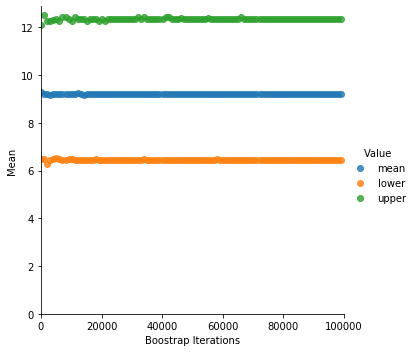

In [0]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')




Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations, ci):
	# <---INSERT YOUR CODE HERE--->
	arrSample = np.empty([n_iterations, sample_size])
	arrIterMean = np.empty([n_iterations])
	for x in range(0, n_iterations):
		arrSample[x]= np.random.choice(data,14)
	data_mean = np.mean(arrSample)

	for x in range (0,n_iterations):
		arrIterMean[x] = np.mean(arrSample[x])
	lower = np.percentile(arrIterMean, 100-ci)
	upper = np.percentile(arrIterMean, ci)

	return data_mean, lower, upper

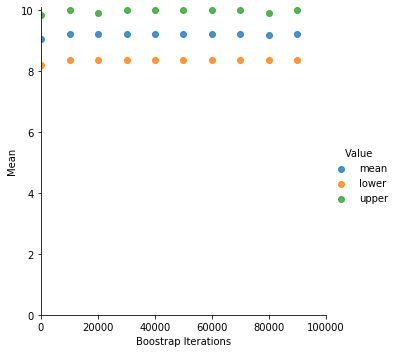

In [0]:

boots = []
for i in range(100, 100000, 10000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 70)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [58]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->
# Note: you can add more cells as needed to organise your code and your plots
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dataCurrent = df.values.T[0]
dataNew = df.values.T[1]

currentMean = np.mean(dataCurrent)
newMean = np.mean(dataNew)

tobs = newMean - currentMean


np.histogram(currentMean)
plt.title("Histogram with 'auto' bins")
Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()


NameError: ignored

In [0]:
data_meanC, lowerC, upperC = boostrap_mean(dataCurrent, dataCurrent.shape[0], )
data_meanN, lowerN, upperN = boostrap_mean(dataNew, dataNew.shape[0], 1)
print(data_meanC, lowerC, upperC)
print(lowerN, upperN)

In [0]:
# Compare the two fleets.
# You can create a permutation test function to do this. Check the lecture notes!

concat = np.concatenate((dataCurrent, dataNew))
perm = np.random.permutation(concat)
